## 모형 결합의 기초
model combining / ensemble methods

복수의 예측 모형을 결합하여 더 나은 성능의 예측을 하려는 시도

**효과**
- 성능 분산이 감소 ( 과최적화 방지 )
- 성능이 안좋은 개별 모형들의 경우, 결합 모형의 성능이 더 향상 (하지만 최소 0.5 이상이어야함)

#### 취합 방법론
사용할 모형의 집합이 결정된 상태로 시작. 모든 모형이 하나의(같은) 문제를 품
- 다수결 (Majority Voting)
- 배깅 (Bagging)
- 랜덤 포레스트 (Random Forests)

#### 부스팅 방법론
사용할 모형을 점진적으로 늘려간다. 앞순서 모형이 못하는 부분을 다음 순서 모형이 풀게 한다.
- 에이다부스트(Ada Boost)
- 그레디언트 부스트(Gradient Boost)

# 다수결 방법
가장 단순한 모형결합. 전혀 다른 모형도 결합 가능
- hard voting : 단순 투표. 개별 모형의 결과 기준
- soft voting : 가중치 투표. 개별 모형의 조건부 확률의 합 기준

scikit

`sklearn.ensemble.VotingClassifier(estimators, voting='hard', weights=None)`

입력 인수:
- `estimators` :
개별 모형 목록, 리스트나 named parameter 형식으로 입력
- `voting` : 문자열 {‘hard’, ‘soft’} (디폴트 ’hard’)
hard voting 과 soft voting 선택
- `weights` : 리스트
사용자 가중치

```
ensemble = VotingClassifier(estimators=[('lr', model1), ('qda', model2), ('gnb', model3)], 
                            voting='soft', weights=[1, 1, 2])
                            ```

### 결합을 통한 성능 향상 실험

/home/mk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  """


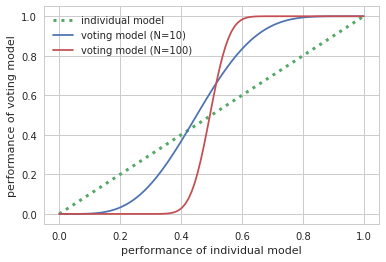

In [2]:
%matplotlib inline
def total_error(p, N):
    te = 0.0
    for k in range(int(np.ceil(N/2)), N + 1):
        te += sp.misc.comb(N, k) * p**k * (1-p)**(N-k)
    return te

x = np.linspace(0, 1, 100)
plt.plot(x, x, 'g:', lw=3, label="individual model")
plt.plot(x, total_error(x, 10), 'b-', label="voting model (N=10)")
plt.plot(x, total_error(x, 100), 'r-', label="voting model (N=100)")
plt.xlabel("performance of individual model")
plt.ylabel("performance of voting model")
plt.legend(loc=0)
plt.show()

# Bagging
1. 모형 결합에서 사용하는 독립적인 모형의 수가 많을 수록 성능 향상이 일어날 가능성이 높다.
1. 그러나 각각 다른 확률 모형을 사용하는데는 한계가 있다.
1. 따라서 `배깅` 방법을 사용하여 **같은 모델이라도 다른 결과를 출력하는** 다수의 모형을 생성

배깅은 bootstrapping과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용
- 데이터 선택 방법에 따라 다음과 같이 부르기도 한다.
> - 같은 데이터 중복 사용 x : Pasting
> - 같은 데이터 중복 사용 o : Bagging
> - 다차원 독립 변수 중 일부 차원을 선택 : Random Subspaces
> - 데이터 샘플과 독립 변수 차원 모두 일부만 랜덤 사용 : Random Patches

성능 평가시에는 트레이닝용 데이터가 아닌 다른 데이터를 사용할 수도 있다.
*이런 데이터를 OOB(out of bag)이라고 한다.*


Scikit

```
sklearn.ensemble.BaggingClassifier(
                                   base_estimator=None, # 기본 모형
                                   n_estimators=10, # 모형 갯수
                                   max_samples=1.0, # 샘플 중 선택할 샘플 수 /비율
                                   max_features=1.0, # 다차원 독립 변수 중 선택할 차원 수 /비율
                                   bootstrap=True, # 중복 사용 여부
                                   bootstrap_features=False, # 차원 중복 여부
                                   oob_score=False, # 성능 평가시 oob 샘플 사용 여부
                                   warm_start=False, #reuse the solution of the previous call to fit and add more estimators to the ensemble, 
                                                                       otherwise, just fit a whole new ensemble.
                                   n_jobs=1, #The number of jobs to run in parallel for both fit and predict. If -1, then set to the number of cores.
                                   random_state=None, verbose=0)```

# Random Forests
의사 결정 나무를 개별 모형으로 사용하는 모형 결합 방법

- 배깅과 비슷 (데이터 샘플의 일부만 선택 사용)
- 하지만 독립 변수 차원을 랜덤하게 감소시킨 다음, (모든 독립 변수 비교 X)
- 그 중에서 독립 변수를 선택
- 개별 모형 사이 상관 관계가 줄어듦 -> 성능 변동이 감소

**Extremely Randomized Trees 모형**
- 각 노드에서 랜덤하게 독립 변수를 선택한다. (강제 할당)

**장점**
 
 
- 속도가 random forest보다 빠름
- 각 독립 변수의 중요도 계산 가능 : `forest.feature_importances_`

포레스트 안에서 사용된 모든 노드에 대해 어떤 독립 변수를 사용하였고 그 노드에서 얻은 information gain을 구할 수 있으므로 각각의 독립 변수들이 얻어낸 information gain의 평균을 비교하면 어떤 독립 변수가 중요한지를 비교할 수 있다. (Extrem의 importance 신뢰도가 높다)